In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
import geopandas as gpd 
import os
import json
from itertools import accumulate
from shapely.geometry import Point, Polygon
import matplotlib.colors as mcolors

In [2]:
basePath = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/"
neighborhood = "Test_70_el Besòs i el Maresme"
parcelsFolder = basePath + "/Results/" + neighborhood + "/Parcels/"

parcel = "4054901DF3845C"#"4157903DF3845E"#
construction = "408"#"86"#


# Panel Placement

In [3]:
cadasterPath = parcelsFolder + parcel + "/" + construction + "/Map files/" + construction + ".gpkg"
cadasterGDF = gpd.read_file(cadasterPath)

planesPath = parcelsFolder + parcel + "/" + construction + "/Plane Identification/" + construction + ".gpkg"
planesGDF = gpd.read_file(planesPath)

In [4]:
panelsGDFs = []
panelsPath = parcelsFolder + parcel + "/" + construction + "/Solar Estimation Panels/"

for file in os.listdir(panelsPath):
    panelsGDFs.append(gpd.read_file(panelsPath + file))

/tmp/ipykernel_362016/3848233510.py:7: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  panels.exterior.plot(ax = ax, edgecolor="blue")


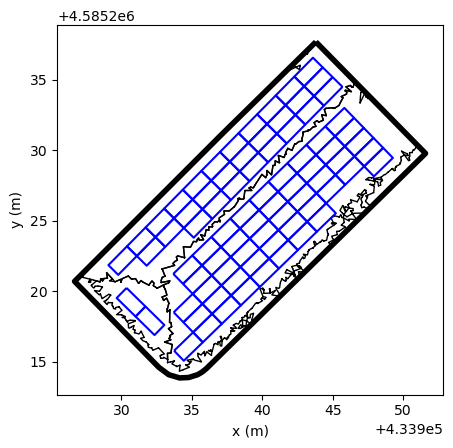

In [5]:
fig, ax = plt.subplots()

planesGDF.plot(ax = ax, edgecolor="black",  facecolor="none")
cadasterGDF.plot(ax = ax, edgecolor="black", facecolor="none", linewidth=4)

for panels in panelsGDFs:
    panels.exterior.plot(ax = ax, edgecolor="blue")

ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_aspect("equal", adjustable='box')
# plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Solar Estimation/Panel Placement.png",bbox_inches='tight')
plt.show()

# PoA Irradiance

<Axes: >

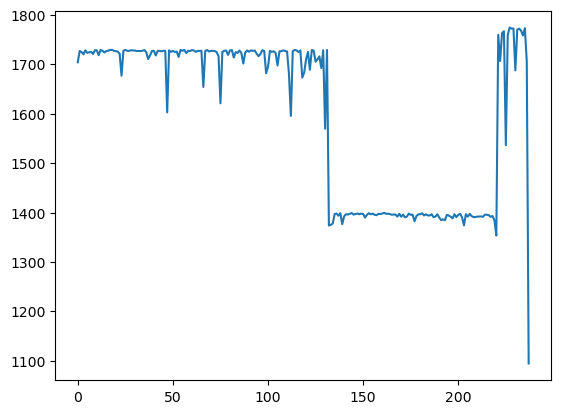

In [6]:
allPoA = pd.DataFrame()
poaPath = parcelsFolder + parcel + "/" + construction + "/Solar Estimation PySAM_POA_Yearly/"

for file in os.listdir(poaPath):
    allPoA = pd.concat([allPoA, pd.read_csv(poaPath + file)], ignore_index=True)

allPoA.annual.plot()

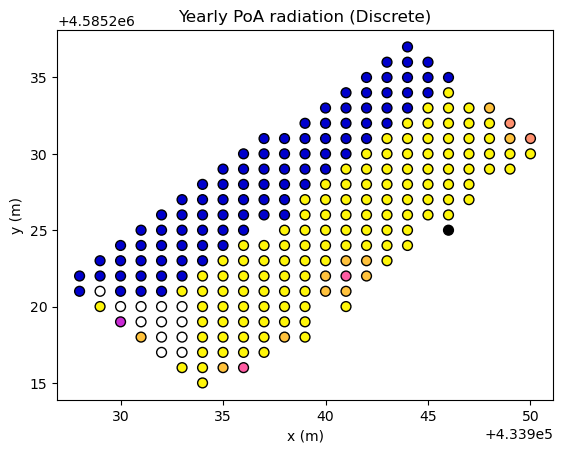

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define the discrete contour levels for z
z_levels = np.arange(1300, 1801, 50)  # From 1300 to 1800 in steps of 50

# Map the continuous z values to discrete levels using np.digitize
z_discrete = np.digitize(allPoA.annual, bins=z_levels) - 1  # Subtract 1 for correct indexing

# Plot the scatter plot with the discrete color mapping
plt.scatter(x=allPoA.x, y=allPoA.y, c=z_discrete, cmap="gnuplot2", edgecolors='k', s=50)

# # Add a colorbar with the specified ticks
# cbar = plt.colorbar()
# cbar.set_ticks(np.arange(len(z_levels)))  # Set the ticks to match the number of levels
# cbar.set_ticklabels=[f'{int(level)}' for level in z_levels]  # Set the tick labels to the discrete levels

# Add axis labels and title
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Yearly PoA radiation (Discrete)")

# Show the plot
plt.show()

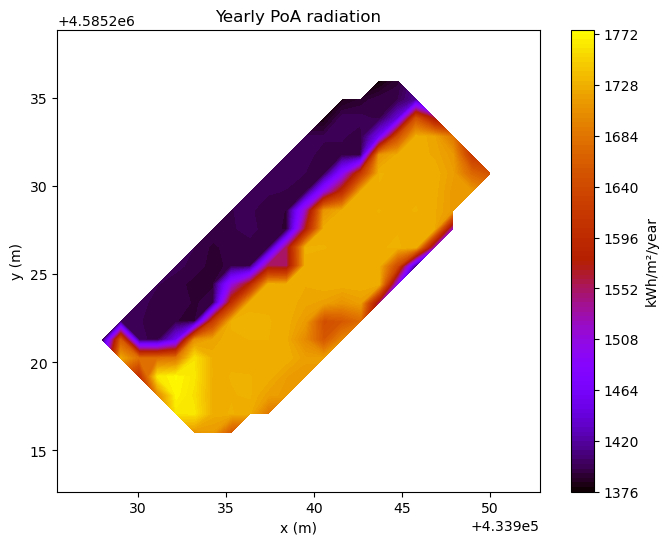

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Assuming shadingsProfiles is a dictionary-like object
x = allPoA["x"]
y = allPoA["y"]
z = allPoA["annual"]

# Create a grid for x and y
xi = np.linspace(min(x), max(x), math.ceil(max(x)-min(x)))
yi = np.linspace(min(y), max(y), math.ceil(max(y)-min(y)))
xi, yi = np.meshgrid(xi, yi)

# Interpolate z onto the grid
zi = griddata((x, y), z, (xi, yi), method='linear')

# Plot the mesh
fig, ax = plt.subplots(figsize=(8, 6))

heatmap = plt.contourf(xi, yi, zi, levels=100, cmap='gnuplot')
cb = fig.colorbar(heatmap, ax=ax, label="kWh/m\u00b2/year")

cbar_ticks = cb.ax.get_yticks()  # Get current colorbar ticks
# cb.ax.set_yticks(cbar_ticks)  # Ensure the same ticks are used
# cb.ax.set_yticklabels([f"{tick:.0f}°" for tick in cbar_ticks])  # Add ° to each tick


# planesGDF[planesGDF.cluster == 4].plot(ax=ax, color="None", edgecolor='black', linewidth=1)

# centroid = cadasterGDF.centroid.values[0]
# centroid = [centroid.x, centroid.y]
# minSize=15
# ax.set_xlim(centroid[0]-minSize, centroid[0]+minSize)
# ax.set_ylim(centroid[1]-minSize, centroid[1]+minSize)

cadasterGDF.plot(ax = ax, edgecolor="none", facecolor="none", linewidth=4)

# Add axis labels and title
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Yearly PoA radiation")

# Show the plot
ax.set_aspect("equal", adjustable='box')
# plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Solar Estimation/PoAExample.png",bbox_inches='tight')
plt.show()

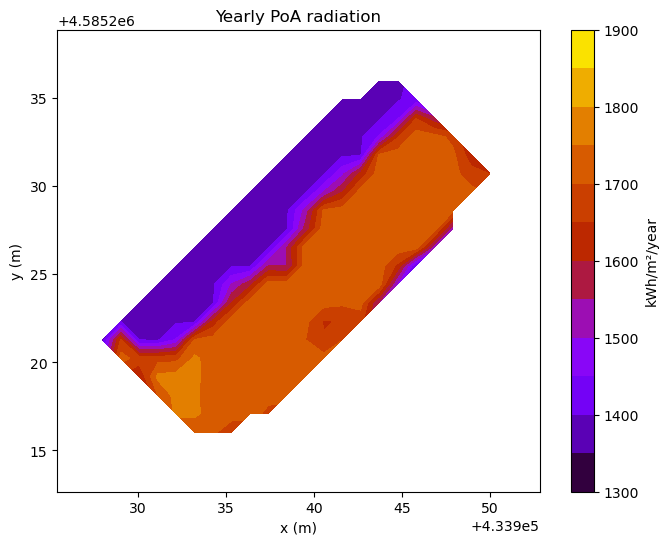

In [32]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Assuming shadingsProfiles is a dictionary-like object
x = allPoA["x"]
y = allPoA["y"]
z = allPoA["annual"]

# Create a grid for x and y
xi = np.linspace(min(x), max(x), math.ceil(max(x)-min(x)))
yi = np.linspace(min(y), max(y), math.ceil(max(y)-min(y)))
xi, yi = np.meshgrid(xi, yi)

# Interpolate z onto the grid
zi = griddata((x, y), z, (xi, yi), method='linear')

# Define the discrete contour levels for z
z_levels = np.arange(1300, 1901, 50)  # From 1300 to 1800 in steps of 100

# Plot the mesh
fig, ax = plt.subplots(figsize=(8, 6))

# Use the discrete levels for contour plot
# heatmap = plt.contourf(xi, yi, zi, levels=z_levels, cmap='YlOrBr_r')
heatmap = plt.contourf(xi, yi, zi, levels=z_levels, cmap='gnuplot')
cb = fig.colorbar(heatmap, ax=ax, label="kWh/m\u00b2/year")

# Optionally adjust the colorbar ticks
cbar_ticks = cb.ax.get_yticks()
cb.ax.set_yticks(cbar_ticks)  # Ensure the same ticks are used

# Add any additional overlays or annotations (e.g., cadasterGDF)
cadasterGDF.plot(ax=ax, edgecolor="none", facecolor="none", linewidth=4)

# Add axis labels and title
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Yearly PoA radiation")

# Show the plot
ax.set_aspect("equal", adjustable='box')

# plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Solar Estimation/PoAExample_Discrete.png", bbox_inches='tight')
# plt.grid(alpha=0.5)
# plt.savefig("/home/jaumeasensio/Documents/TFM/Report_Sample/4054901DF3845C_408_PoA.png",bbox_inches='tight', dpi=300)
plt.show()

In [93]:
allPoA["annual"].to_csv("/home/jaumeasensio/Documents/TFM/Report_Sample/4054901DF3845C_408_PoAData.csv", index=False)

# Panels with generation

In [9]:
allSunDC = pd.DataFrame()
sunPath = parcelsFolder + parcel + "/" + construction + "/Solar Estimation PySAM_DC_Yearly/"

for file in os.listdir(sunPath):
    allSunDC = pd.concat([allSunDC, pd.read_csv(sunPath + file)], ignore_index=True)

allSunDC["annual"] = allSunDC["annual"]/1000*(1.879*1.045)


In [10]:
days = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
# cumulative_sum = list(accumulate(days))

In [11]:
for panels in panelsGDFs:
    yearlyList = []
    for panelID in range(len(panels)):
        panel = panels.iloc[panelID].geometry

        allSunDC["inside_panel"] = allSunDC.apply(lambda row: panel.contains(Point(row["x"], row["y"])), axis=1)

        # Filter points inside the panel and calculate the average annual
        average_annual = allSunDC[allSunDC["inside_panel"]]["annual"].mean()
        yearlyList.append(average_annual)
    panels["yearly"] = yearlyList

combined_gdf = gpd.GeoDataFrame(pd.concat(panelsGDFs, ignore_index=True))
combined_gdf

,geometry,yearly
0,"POLYGON ((433944.469 4585231.703, 433945.158 4...",553.240699
1,"POLYGON ((433945.158 4585230.992, 433945.847 4...",553.764332
2,"POLYGON ((433945.847 4585230.282, 433946.536 4...",553.761616
3,"POLYGON ((433946.536 4585229.572, 433947.225 4...",552.006356
4,"POLYGON ((433947.225 4585228.862, 433947.913 4...",545.985248
...,...,...
73,"POLYGON ((433945.685 4585234.502, 433944.986 4...",443.904981
74,"POLYGON ((433944.986 4585235.191, 433944.287 4...",444.367303
75,"POLYGON ((433944.287 4585235.88, 433943.588 45...",441.465901
76,"POLYGON ((433931.705 4585218.921, 433931.005 4...",569.185496


<Axes: >

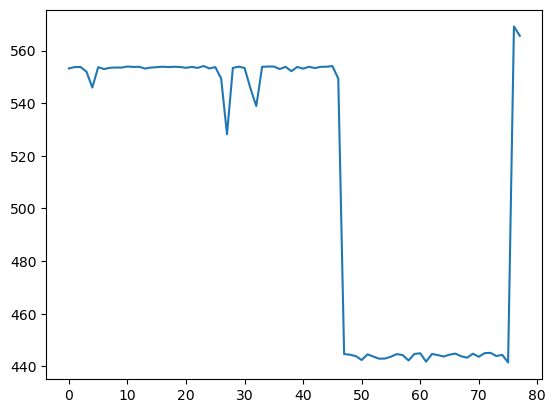

In [12]:
combined_gdf.yearly.plot()

In [13]:
combined_gdf.to_file(parcelsFolder + parcel + "/" + construction + "/Solar Estimation Panels Simulated/" + construction + ".gpkg")

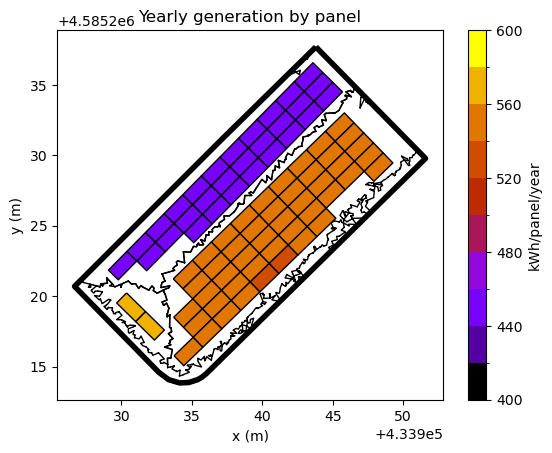

In [14]:
fig, ax = plt.subplots()

planesGDF.plot(ax = ax, edgecolor="black",  facecolor="none")
cadasterGDF.plot(ax = ax, edgecolor="black", facecolor="none", linewidth=4)


boundaries = np.arange(400, 601, 20)  # From 200 to 300, in steps of 20
norm = mcolors.BoundaryNorm(boundaries, ncolors=256)


# combined_gdf.plot(ax = ax, column='yearly', edgecolor="black", legend=True, cmap='gnuplot', vmin=200, vmax=300)
im = combined_gdf.plot(ax=ax, column='yearly', edgecolor="black", legend=True,
                  cmap='gnuplot', norm=norm, legend_kwds={"label": "kWh/panel/year", "orientation": "vertical"})

# cb = fig.colorbar(norm, ax=ax, label="kWh/m\u00b2/year")
ax.set_title("Yearly generation by panel")
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_aspect("equal", adjustable='box')
# plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Solar Estimation/Panel Simulation.png",bbox_inches='tight')
# plt.grid(alpha=0.5)
# plt.savefig("/home/jaumeasensio/Documents/TFM/Report_Sample/4054901DF3845C_408_Panels.png",bbox_inches='tight', dpi=300)
plt.show()

# Compare with Google

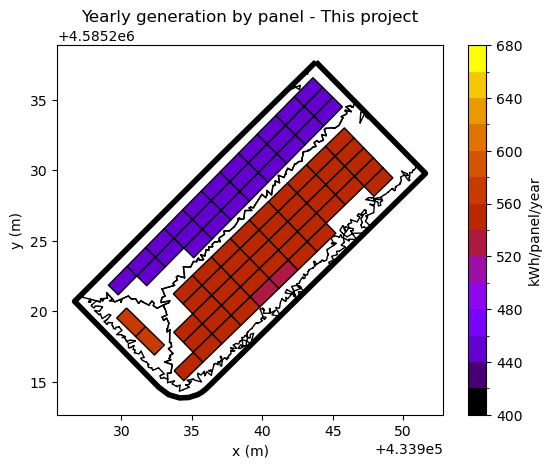

In [30]:
fig, ax = plt.subplots()

planesGDF.plot(ax = ax, edgecolor="black",  facecolor="none")
cadasterGDF.plot(ax = ax, edgecolor="black", facecolor="none", linewidth=4)


boundaries = np.arange(400, 681, 20)  # From 200 to 300, in steps of 20
norm = mcolors.BoundaryNorm(boundaries, ncolors=256)


# combined_gdf.plot(ax = ax, column='yearly', edgecolor="black", legend=True, cmap='gnuplot', vmin=200, vmax=300)
im = combined_gdf.plot(ax=ax, column='yearly', edgecolor="black", legend=True,
                  cmap='gnuplot', norm=norm, legend_kwds={"label": "kWh/panel/year", "orientation": "vertical"})

# cb = fig.colorbar(norm, ax=ax, label="kWh/m\u00b2/year")
ax.set_title("Yearly generation by panel - This project")
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_aspect("equal", adjustable='box')
plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Google/Panel Simulation - Mine.png",bbox_inches='tight')
# plt.grid(alpha=0.5)
# plt.savefig("/home/jaumeasensio/Documents/TFM/Report_Sample/4054901DF3845C_408_Panels.png",bbox_inches='tight', dpi=300)
plt.show()

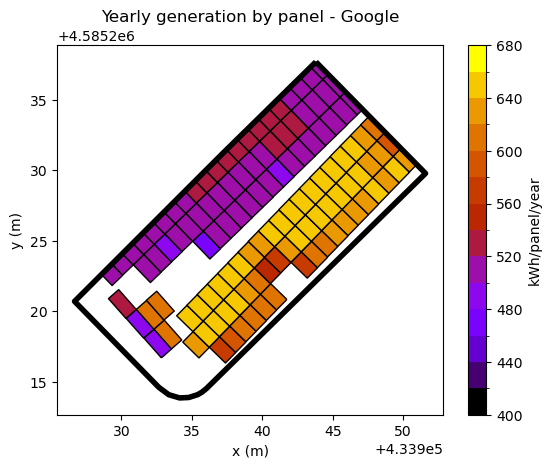

In [29]:
fig, ax = plt.subplots()

# planesGDF.plot(ax = ax, edgecolor="black",  facecolor="none")

boundaries = np.arange(400, 681, 20)  # From 200 to 300, in steps of 20
norm = mcolors.BoundaryNorm(boundaries, ncolors=256)

panelsGoogle = gpd.read_file(basePath + "Results/Test_70_el Besòs i el Maresme/GoogleComparison/4054901DF3845C/408/Google Panel Generation/408.gpkg")
# combined_gdf.plot(ax = ax, column='yearly', edgecolor="black", legend=True, cmap='gnuplot', vmin=200, vmax=300)
im = panelsGoogle.plot(ax=ax, column='yearlyEnergyDcKwh', edgecolor="black", legend=True,
                  cmap='gnuplot', norm=norm, legend_kwds={"label": "kWh/panel/year", "orientation": "vertical"})

cadasterGDF.plot(ax = ax, edgecolor="black", facecolor="none", linewidth=4)
# cb = fig.colorbar(norm, ax=ax, label="kWh/m\u00b2/year")
ax.set_title("Yearly generation by panel - Google")
ax.set_xlabel("x (m)")
ax.set_ylabel("y (m)")
ax.set_aspect("equal", adjustable='box')
plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Google/Panel Simulation - Google.png",bbox_inches='tight')
# plt.grid(alpha=0.5)
# plt.savefig("/home/jaumeasensio/Documents/TFM/Report_Sample/4054901DF3845C_408_Panels.png",bbox_inches='tight', dpi=300)
plt.show()

(433925.431, 433952.821) (4585212.659, 4585238.882999999)


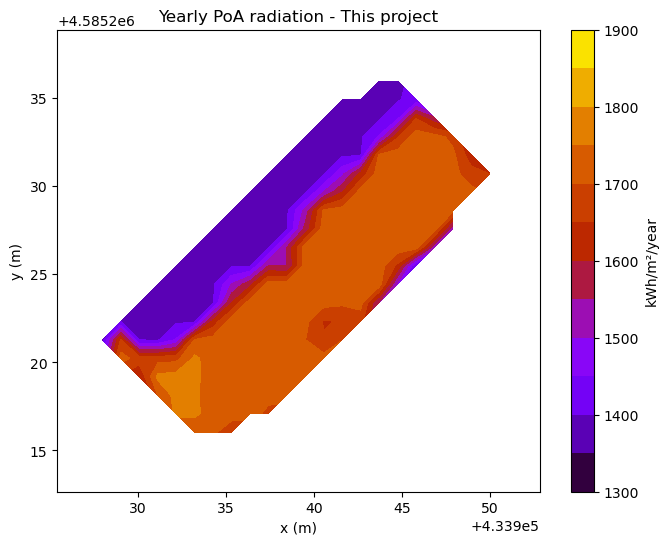

In [51]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Assuming shadingsProfiles is a dictionary-like object
x = allPoA["x"]
y = allPoA["y"]
z = allPoA["annual"]

# Create a grid for x and y
xi = np.linspace(min(x), max(x), math.ceil(max(x)-min(x)))
yi = np.linspace(min(y), max(y), math.ceil(max(y)-min(y)))
xi, yi = np.meshgrid(xi, yi)

# Interpolate z onto the grid
zi = griddata((x, y), z, (xi, yi), method='linear')

# Define the discrete contour levels for z
z_levels = np.arange(1300, 1901, 50)  # From 1300 to 1800 in steps of 100

# Plot the mesh
fig, ax = plt.subplots(figsize=(8, 6))

# Use the discrete levels for contour plot
# heatmap = plt.contourf(xi, yi, zi, levels=z_levels, cmap='YlOrBr_r')
heatmap = plt.contourf(xi, yi, zi, levels=z_levels, cmap='gnuplot')
cb = fig.colorbar(heatmap, ax=ax, label="kWh/m\u00b2/year")

# Optionally adjust the colorbar ticks
cbar_ticks = cb.ax.get_yticks()
cb.ax.set_yticks(cbar_ticks)  # Ensure the same ticks are used

# Add any additional overlays or annotations (e.g., cadasterGDF)
cadasterGDF.plot(ax=ax, edgecolor="none", facecolor="none", linewidth=4)

# Add axis labels and title
plt.xlabel("x (m)")
plt.ylabel("y (m)")

print(ax.get_xlim(), ax.get_ylim())
plt.title("Yearly PoA radiation - This project")

# Show the plot
ax.set_aspect("equal", adjustable='box')

plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Google/PoA - Mine.png",bbox_inches='tight')
# plt.grid(alpha=0.5)
# plt.savefig("/home/jaumeasensio/Documents/TFM/Report_Sample/4054901DF3845C_408_PoA.png",bbox_inches='tight', dpi=300)
plt.show()

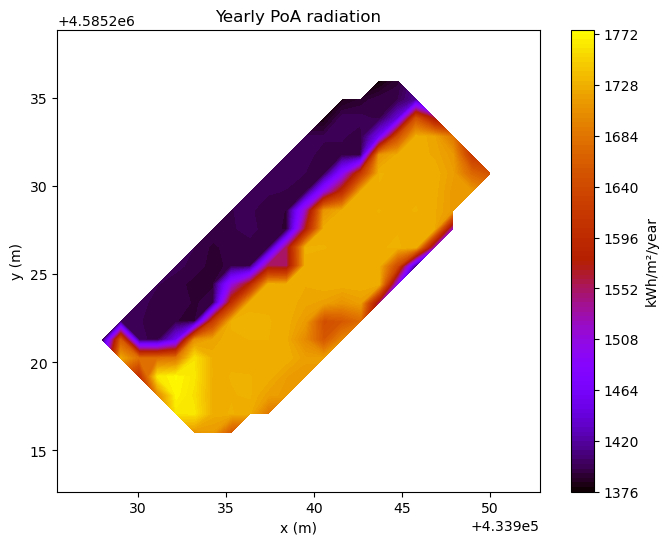

In [45]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Assuming shadingsProfiles is a dictionary-like object
x = allPoA["x"]
y = allPoA["y"]
z = allPoA["annual"]

# Create a grid for x and y
xi = np.linspace(min(x), max(x), math.ceil(max(x)-min(x)))
yi = np.linspace(min(y), max(y), math.ceil(max(y)-min(y)))
xi, yi = np.meshgrid(xi, yi)

# Interpolate z onto the grid
zi = griddata((x, y), z, (xi, yi), method='linear')

# Plot the mesh
fig, ax = plt.subplots(figsize=(8, 6))

heatmap = plt.contourf(xi, yi, zi, levels=100, cmap='gnuplot')
cb = fig.colorbar(heatmap, ax=ax, label="kWh/m\u00b2/year")

cbar_ticks = cb.ax.get_yticks()  # Get current colorbar ticks
# cb.ax.set_yticks(cbar_ticks)  # Ensure the same ticks are used
# cb.ax.set_yticklabels([f"{tick:.0f}°" for tick in cbar_ticks])  # Add ° to each tick


# planesGDF[planesGDF.cluster == 4].plot(ax=ax, color="None", edgecolor='black', linewidth=1)

# centroid = cadasterGDF.centroid.values[0]
# centroid = [centroid.x, centroid.y]
# minSize=15
# ax.set_xlim(centroid[0]-minSize, centroid[0]+minSize)
# ax.set_ylim(centroid[1]-minSize, centroid[1]+minSize)

cadasterGDF.plot(ax = ax, edgecolor="none", facecolor="none", linewidth=4)

# Add axis labels and title
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.title("Yearly PoA radiation")

# Show the plot
ax.set_aspect("equal", adjustable='box')
# plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Solar Estimation/PoAExample.png",bbox_inches='tight')
plt.show()

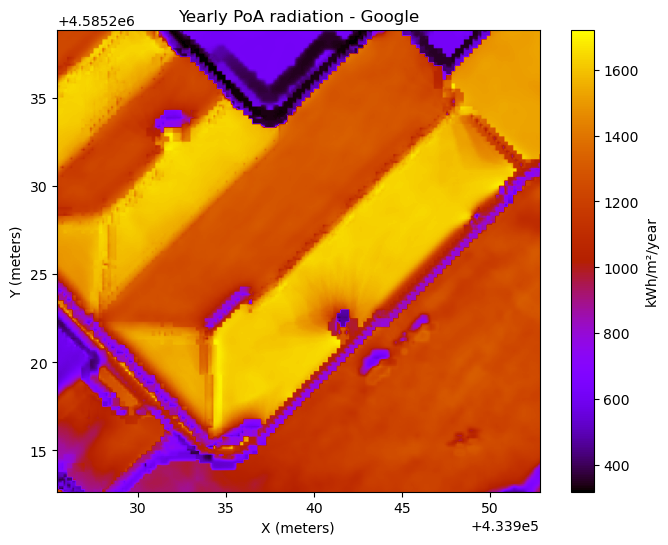

In [53]:
import tifffile as tiff
responseFile = basePath + "GoogleAPItests/Results/4054901DF3845C/408/annualFlux.tiff"
with tiff.TiffFile(responseFile) as tif:
    for i, page in enumerate(tif.pages):
        image = page.asarray()

topY = tif.geotiff_metadata["ModelTransformation"][1][3]
leftX = tif.geotiff_metadata["ModelTransformation"][0][3]

height, width = image.shape

# Create a spatial extent (each pixel is 0.1m)
extent = [leftX, leftX + width * 0.1, topY - height * 0.1, topY]

# Plot the image
fig, ax = plt.subplots(figsize=(8, 6))
plt.imshow(image, cmap='gnuplot', extent=extent, origin='upper')
plt.colorbar(label="kWh/m\u00b2/year")
plt.title('Yearly PoA radiation - Google')
plt.xlabel('X (meters)')
plt.ylabel('Y (meters)')
plt.xlim(433925.431, 433952.821)
plt.ylim(4585212.659, 4585238.882999999)

plt.savefig("/home/jaumeasensio/Documents/TFM/Redacció memòria/Figures/Google/PoA - Google.png",bbox_inches='tight')
plt.show()

# Continues

In [100]:
combined_gdf

,geometry,yearly
0,"POLYGON ((433944.469 4585231.703, 433945.158 4...",553.240699
1,"POLYGON ((433945.158 4585230.992, 433945.847 4...",553.764332
2,"POLYGON ((433945.847 4585230.282, 433946.536 4...",553.761616
3,"POLYGON ((433946.536 4585229.572, 433947.225 4...",552.006356
4,"POLYGON ((433947.225 4585228.862, 433947.913 4...",545.985248
...,...,...
73,"POLYGON ((433945.685 4585234.502, 433944.986 4...",443.904981
74,"POLYGON ((433944.986 4585235.191, 433944.287 4...",444.367303
75,"POLYGON ((433944.287 4585235.88, 433943.588 45...",441.465901
76,"POLYGON ((433931.705 4585218.921, 433931.005 4...",569.185496


In [102]:
combined_gdf["yearly"].to_csv("/home/jaumeasensio/Documents/TFM/Report_Sample/4054901DF3845C_408_PanelsData.csv", index=False)

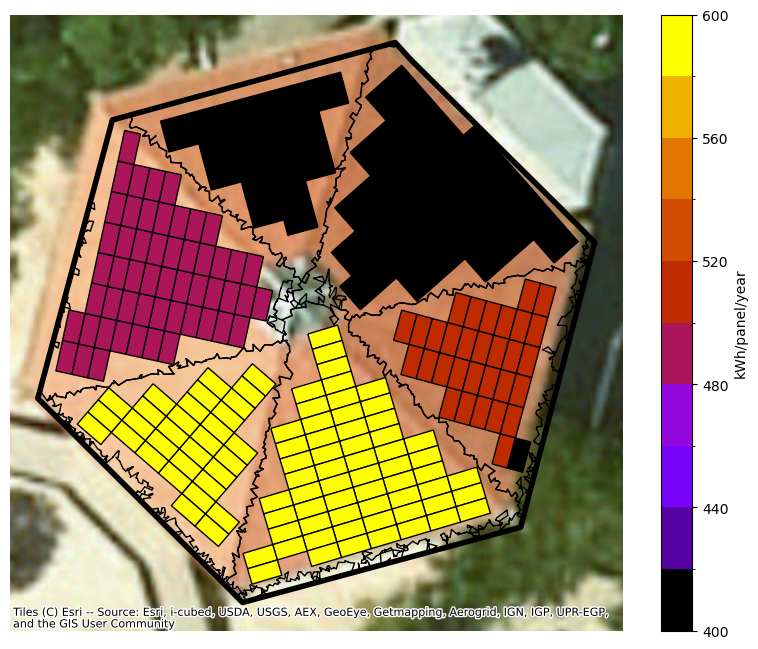

In [83]:
import contextily as ctx

fig, ax = plt.subplots(figsize=(10,8))

gdf = planesGDF.to_crs(epsg=3857)
gdf.plot(ax = ax, edgecolor="black",  facecolor="none")
gdf = cadasterGDF.to_crs(epsg=3857)
gdf.plot(ax = ax, edgecolor="black",  facecolor="none", linewidth=4)
# cadasterGDF.plot(ax = ax, edgecolor="black", facecolor="none", linewidth=4)
# ax.set_axis_off()  # Optional, to hide the axis

ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery, zoom=20)

gdf = combined_gdf.to_crs(epsg=3857)
gdf.plot(ax=ax, column='yearly', edgecolor="black", legend=True,
                  cmap='gnuplot', norm=norm, legend_kwds={"label": "kWh/panel/year", "orientation": "vertical"})
# plt.tight_layout()
ax.axis("off")
plt.show()

# Extra, how much does shading contribute?

In [108]:
# Load all Google Results into a giant dataframe
basePathGoogle = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/GoogleAPItests/Results/"
basePathParcels = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Results/Test_70_el Besòs i el Maresme/Parcels/"
basePathResults = "/home/jaumeasensio/Documents/Projectes/BEEGroup/solar_potencial_estimation_v3/Results/Test_70_el Besòs i el Maresme/GoogleComparison/"

parcelList = []
constructionList = []
countList = []
generationList = []
averageList = []

for parcel in [x for x in os.listdir(basePathParcels) if os.path.isdir(basePathParcels+x)]:
    for construction in  [x for x in os.listdir(basePathParcels + parcel) if os.path.isdir(basePathParcels + parcel + "/" + x)]:
        constructionFile = basePathParcels + parcel + "/" + construction + "/Solar Estimation Panels Simulated/" + construction + ".gpkg"
        try:
            constructionGDF = gpd.read_file(constructionFile) 

            parcelList.append(parcel)
            constructionList.append(construction)
            countList.append(len(constructionGDF))
            generationList.append(constructionGDF.yearly.sum()/1000)
            averageList.append(constructionGDF.yearly.mean())
        except:
            parcelList.append(parcel)
            constructionList.append(construction)
            countList.append(0)
            generationList.append(0)
            averageList.append(0)

shaded = pd.DataFrame({
        "parcel":parcelList,
        "construction": constructionList,
        "count": countList,
        "generation": generationList,
        "average": averageList
    })

shaded

,parcel,construction,count,generation,average
0,4151302DF3845A,139,306,156.441828,511.247802
1,4151302DF3845A,305,328,180.357171,549.869423
2,4153906DF3845C,773,564,290.606740,515.260177
3,4153906DF3845C,771,782,404.082884,516.730031
4,4153906DF3845C,777,140,71.905565,513.611180
5,4151314DF3845A,613,140,70.397447,513.849977
6,4151314DF3845A,634,0,0.000000,NaN
7,4151314DF3845A,672,571,290.524330,508.799177
8,4151314DF3845A,665,298,150.581099,505.305701
9,4151314DF3845A,609,2,1.160090,580.045226


In [109]:
parcelList = []
constructionList = []
countList = []
generationList = []
averageList = []

for parcel in [x for x in os.listdir(basePathParcels) if os.path.isdir(basePathParcels+x)]:
    for construction in  [x for x in os.listdir(basePathParcels + parcel) if os.path.isdir(basePathParcels + parcel + "/" + x)]:
        constructionFile = basePathParcels + parcel + "/" + construction + "/Solar Estimation Panels Simulated_Unshaded/" + construction + ".gpkg"
        try:
            constructionGDF = gpd.read_file(constructionFile) 

            parcelList.append(parcel)
            constructionList.append(construction)
            countList.append(len(constructionGDF))
            generationList.append(constructionGDF.yearly.sum()/1000)
            averageList.append(constructionGDF.yearly.mean())
        except:
            parcelList.append(parcel)
            constructionList.append(construction)
            countList.append(0)
            generationList.append(0)
            averageList.append(0)

unshaded = pd.DataFrame({
        "parcel":parcelList,
        "construction": constructionList,
        "count": countList,
        "generation": generationList,
        "average": averageList
    })

unshaded

,parcel,construction,count,generation,average
0,4151302DF3845A,139,306,158.714872,518.676053
1,4151302DF3845A,305,328,180.886715,551.483887
2,4153906DF3845C,773,564,292.238550,518.153457
3,4153906DF3845C,771,782,405.172700,518.123658
4,4153906DF3845C,777,140,72.374803,516.962878
5,4151314DF3845A,613,140,70.995238,518.213415
6,4151314DF3845A,634,0,0.000000,NaN
7,4151314DF3845A,672,571,291.276587,510.116614
8,4151314DF3845A,665,298,151.252150,507.557550
9,4151314DF3845A,609,2,1.173509,586.754511


In [111]:
totalShadedProd = shaded.generation.sum()
totalUnshadedProd = unshaded.generation.sum()
count = shaded["count"].sum()
print(count)

7074


In [115]:
print(totalShadedProd/count*1000)
print(totalUnshadedProd/count*1000)

(totalUnshadedProd-totalShadedProd)/totalShadedProd*100

511.1418403459068
515.1694511221195


0.7879634297765845